In [3]:
import numpy as np
genders = ["male", "female"]
persons = []
with open("data/person_data.txt") as fh:
  for line in fh:
    persons.append(line.strip().split())
firstnames = {}
heights = {}
for gender in genders:
  firstnames[gender] = [ x[0] for x in persons if x[4]==gender]
  heights[gender] = [ x[2] for x in persons if x[4]==gender]
  heights[gender] = np.array(heights[gender], int)
for gender in ("female", "male"):
  print(gender + ":")
  print(firstnames[gender][:10])
  print(heights[gender][:10])


female:
['Stephanie', 'Cynthia', 'Katherine', 'Elizabeth', 'Carol', 'Christina', 'Beverly', 'Sharon', 'Denise', 'Rebecca']
[149 174 183 138 145 161 179 162 148 196]
male:
['Randy', 'Jessie', 'David', 'Stephen', 'Jerry', 'Billy', 'Earl', 'Todd', 'Martin', 'Kenneth']
[184 175 187 192 204 180 184 174 177 200]


In [4]:
from collections import Counter
import numpy as np
class Feature:
  def __init__(self, data, name=None, bin_width=None):
    self.name = name
    self.bin_width = bin_width
    if bin_width:
      self.min, self.max = min(data), max(data)
      bins = np.arange((self.min // bin_width) * bin_width,
(self.max // bin_width) * bin_width,bin_width)
      freq, bins = np.histogram(data, bins)
      self.freq_dict = dict(zip(bins, freq))
      self.freq_sum = sum(freq)
    else:
      self.freq_dict = dict(Counter(data))
      self.freq_sum = sum(self.freq_dict.values())

  def frequency(self, value):
    if self.bin_width:
      value = (value // self.bin_width) * self.bin_width
    if value in self.freq_dict:
      return self.freq_dict[value]
    else:
      return 0

In [5]:
fts = {}
for gender in genders:
  fts[gender] = Feature(heights[gender], name=gender, bin_width=5)
  print(gender, fts[gender].freq_dict)

male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


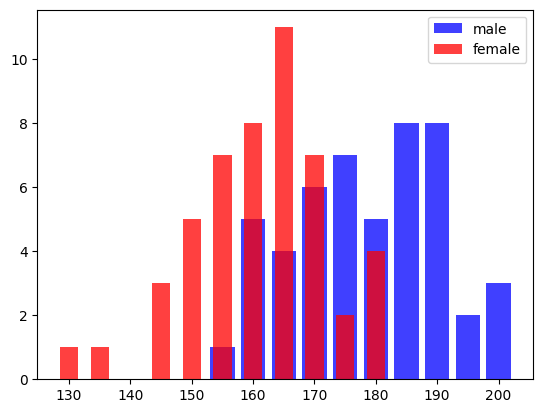

In [7]:
import matplotlib.pyplot as plt
for gender in genders:
  frequencies = list(fts[gender].freq_dict.items())
  frequencies.sort(key=lambda x: x[1])
  X, Y = zip(*frequencies)
  color = "blue" if gender=="male" else "red"
  bar_width = 4 if gender=="male" else 3
  plt.bar(X, Y, bar_width, color=color, alpha=0.75, label=gender)

plt.legend(loc='upper right')
plt.show()


In [8]:
class NBclass:
  def __init__(self, name, *features):
    self.features = features
    self.name = name
  def probability_value_given_feature(self,feature_value,feature):
    if feature.freq_sum == 0:
      return 0
    else:
      return feature.frequency(feature_value) / feature.freq_sum

In [9]:
cls = {}
for gender in genders:
  cls[gender] = NBclass(gender, fts[gender])


In [10]:
class Classifier:
  def __init__(self, *nbclasses):
    self.nbclasses = nbclasses
  def prob(self, *d, best_only=True):
    nbclasses = self.nbclasses
    probability_list = []
    for nbclass in nbclasses:
      ftrs = nbclass.features
      prob = 1
      for i in range(len(ftrs)):
        prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
      probability_list.append( (prob, nbclass.name) )
    prob_values = [f[0] for f in probability_list]
    prob_sum = sum(prob_values)
    if prob_sum==0:
      number_classes = len(self.nbclasses)
      pl = []
      for prob_element in probability_list:
        pl.append( ((1 / number_classes), prob_element[1]))
      probability_list = pl
    else:
      probability_list = [ (p[0] / prob_sum, p[1]) for p in probability_list]
    if best_only:
      return max(probability_list)
    else:
      return probability_list

In [11]:
c = Classifier(cls["male"], cls["female"])
for i in range(130, 220, 5):
  print(i, c.prob(i, best_only=False))


130 [(0.0, 'male'), (1.0, 'female')]
135 [(0.0, 'male'), (1.0, 'female')]
140 [(0.5, 'male'), (0.5, 'female')]
145 [(0.0, 'male'), (1.0, 'female')]
150 [(0.0, 'male'), (1.0, 'female')]
155 [(0.125, 'male'), (0.875, 'female')]
160 [(0.3846153846153847, 'male'), (0.6153846153846154, 'female')]
165 [(0.26666666666666666, 'male'), (0.7333333333333333, 'female')]
170 [(0.4615384615384616, 'male'), (0.5384615384615385, 'female')]
175 [(0.7777777777777778, 'male'), (0.22222222222222224, 'female')]
180 [(0.5555555555555556, 'male'), (0.4444444444444445, 'female')]
185 [(1.0, 'male'), (0.0, 'female')]
190 [(1.0, 'male'), (0.0, 'female')]
195 [(1.0, 'male'), (0.0, 'female')]
200 [(1.0, 'male'), (0.0, 'female')]
205 [(0.5, 'male'), (0.5, 'female')]
210 [(0.5, 'male'), (0.5, 'female')]
215 [(0.5, 'male'), (0.5, 'female')]


In [12]:
fts = {}
cls = {}
for gender in genders:
  fts_names = Feature(firstnames[gender], name=gender)
  cls[gender] = NBclass(gender, fts_names)
c = Classifier(cls["male"], cls["female"])
testnames = ['Edgar', 'Benjamin', 'Fred', 'Albert', 'Laura',
'Maria', 'Paula', 'Sharon', 'Jessie']
for name in testnames:
  print(name, c.prob(name))

Edgar (0.5, 'male')
Benjamin (1.0, 'male')
Fred (1.0, 'male')
Albert (1.0, 'male')
Laura (1.0, 'female')
Maria (1.0, 'female')
Paula (1.0, 'female')
Sharon (1.0, 'female')
Jessie (0.6666666666666667, 'female')


In [13]:
[person for person in persons if person[0] == "Jessie"]


[['Jessie', 'Morgan', '175', '67.0', 'male'],
 ['Jessie', 'Bell', '165', '65', 'female'],
 ['Jessie', 'Washington', '159', '56', 'female'],
 ['Jessie', 'Davis', '174', '45', 'female'],
 ['Jessie', 'Johnson', '165', '30.0', 'male'],
 ['Jessie', 'Thomas', '168', '69', 'female']]

In [14]:
cls = {}
for gender in genders:
  fts_heights = Feature(heights[gender], name="heights", bin_width=5)
  fts_names = Feature(firstnames[gender], name="names")
  cls[gender] = NBclass(gender, fts_names, fts_heights)

c = Classifier(cls["male"], cls["female"])
for d in [("Maria", 140), ("Anthony", 200), ("Anthony", 153),
("Jessie", 188) , ("Jessie", 159), ("Jessie", 160) ]:
  print(d, c.prob(*d, best_only=False))


('Maria', 140) [(0.5, 'male'), (0.5, 'female')]
('Anthony', 200) [(1.0, 'male'), (0.0, 'female')]
('Anthony', 153) [(0.5, 'male'), (0.5, 'female')]
('Jessie', 188) [(1.0, 'male'), (0.0, 'female')]
('Jessie', 159) [(0.06666666666666667, 'male'), (0.9333333333333333, 'female')]
('Jessie', 160) [(0.23809523809523817, 'male'), (0.761904761904762, 'female')]
